In [1]:
import json
import pandas as pd

In [2]:
with open('reviews.json') as f:
    reviews = f.read().strip().split("\n")
    

In [3]:
review_list = pd.DataFrame(columns = json.loads(reviews[0]))

In [4]:
for review in reviews:
    one = json.loads(review)
    review_list.loc[-1] = [one['name'],one['date'],one['text'],one['score']]
    review_list.index = review_list.index + 1
    review_list = review_list.sort_index()

In [5]:
review_list

,name,date,text,score
0,Heather,2018-04-08 00:00:00,When I click the button it shines brightly,5.0
1,smokey,2018-04-08 00:00:00,i have to buy batteries china junk,1.0
2,Susan,2018-04-07 00:00:00,Arrived on time and product is as depicted. G...,5.0
3,JiaHui Chen,2018-04-07 00:00:00,"This is a small iron flashlight, it is very co...",5.0
4,Amazon Customer,2018-04-07 00:00:00,Awesome flashlight for the price!,5.0
5,Atlanta Jake,2018-04-07 00:00:00,Got these two flashlights on sale and well wor...,5.0
6,An N.,2018-04-07 00:00:00,Decent enough light. But I hated the fact that...,2.0
7,MW,2018-04-06 00:00:00,It’s tiny cute flashlight. As of luminous flu...,5.0
8,Nicholas Kisling,2018-04-06 00:00:00,Better than I was expecting for the price and ...,4.0
9,Jing Zhang,2018-04-06 00:00:00,This is one of the must haves for each and eve...,5.0


In [6]:
#detect fake reviews
review_list['text length'] = review_list['text'].apply(lambda x: len(x.split()))
review_list['name length'] = review_list['name'].apply(lambda x: len(x))

In [7]:
full_star_review = review_list[(review_list.score == 5.0)]

In [8]:
full_star_review.plot.scatter(x='name length', y='text length',alpha = 0.1)

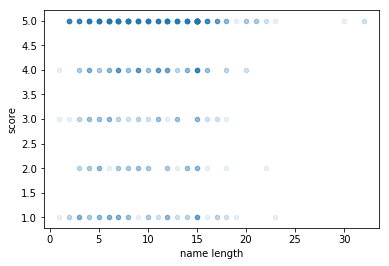

In [9]:
review_list.plot.scatter(x='name length', y='score',alpha = 0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010D99A7C9E8>,
      dtype=object)

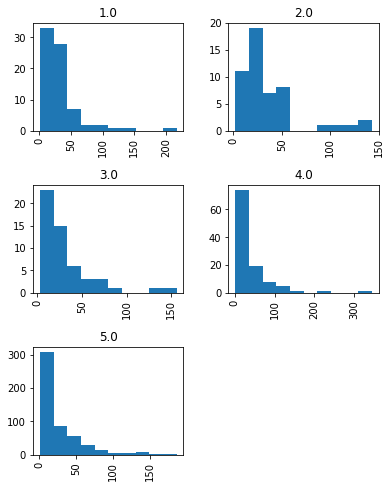

In [10]:
review_list['text length'].hist(by = review_list['score'], figsize = (6,8))

In [11]:
pd.value_counts(review_list['score'])

5.0    516
4.0    109
1.0     75
3.0     53
2.0     50
Name: score, dtype: int64

In [12]:
review_list['text length'].describe()

count    803.000000
mean      28.926526
std       34.411523
min        1.000000
25%        7.000000
50%       17.000000
75%       38.000000
max      345.000000
Name: text length, dtype: float64

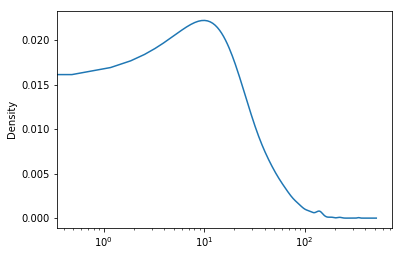

In [13]:
review_list['text length'].plot(kind='kde', logx=True)

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
import spacy

nlp = spacy.load('en')

In [16]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True, stop_words='english',)
posf = PartOfSpeechFilter()


In [18]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                    ])
pipeline.set_params(**{'posf__stop_words': None})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)


Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [19]:
preproc_reviews = pipeline.fit_transform(review_list.text)

In [20]:
preproc_reviews 

<803x173 sparse matrix of type '<class 'numpy.int64'>'
	with 5819 stored elements in Compressed Sparse Row format>

In [21]:
sum_across_rows = preproc_reviews.sum(axis=1)
print('Shape of result: ', sum_across_rows.shape)

Shape of result:  (803, 1)


In [22]:
sum_across_rows[:10]

matrix([[ 2],
        [ 2],
        [13],
        [12],
        [ 3],
        [19],
        [ 6],
        [ 9],
        [19],
        [ 6]], dtype=int64)

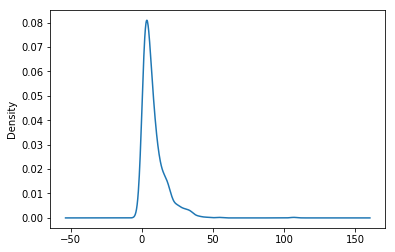

In [23]:
pd.Series(sum_across_rows.A1).plot(kind='kde')#Return self as a flattened array

In [24]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 173)

In [25]:
pipe_cv = pipeline.named_steps['cv']
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))

In [26]:
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('flashlight', 394),
 ('light', 383),
 ('pron', 326),
 ('bright', 304),
 ('great', 237),
 ('work', 212),
 ('battery', 206),
 ('good', 193),
 ('use', 169),
 ('small', 150)]

In [27]:
#flashlight should be removed, because these reviews are all about flashlight
#remove pron,because for word i, it, its, t.lemma_ will return pron

In [28]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                   ])

pipeline.set_params(**{'posf__stop_words': {'flashlight','-PRON-'}})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews = pipeline.fit_transform(review_list.text)

In [29]:
preproc_reviews.shape

(803, 171)

In [30]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 171)

In [31]:
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('lens', 383),
 ('bright', 304),
 ('good', 237),
 ('weight', 212),
 ('battery', 206),
 ('glove', 193),
 ('try', 169),
 ('single', 150),
 ('like', 117),
 ('press', 112)]

In [32]:
type(review_list.score.values)

numpy.ndarray

In [33]:
X = preproc_reviews
y = review_list.score.values

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

lr.fit(preproc_reviews, review_list.score.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(review_list.score.values, lr.predict(preproc_reviews))

In [37]:
conf_matrix

array([[ 54,   0,   0,   4,  17],
       [  8,  27,   0,   1,  14],
       [  2,   0,  16,   5,  30],
       [  2,   0,   0,  40,  67],
       [  2,   1,   1,   5, 507]], dtype=int64)

In [38]:
lr.score(preproc_reviews, review_list.score.values)

0.8019925280199253

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
fs_chi2 = SelectKBest(chi2, k=150)
X_kbest = fs_chi2.fit_transform(preproc_reviews.toarray(), review_list.score.values)

In [41]:
X_kbest.shape

(803, 150)

In [42]:
lr.fit(X_kbest, review_list.score.values)
lr.score(X_kbest, review_list.score.values)

0.7945205479452054

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(lr, preproc_reviews, review_list.score.values, cv=10, #sklearn does stratified sampling default
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6924887782213861

In [45]:
scores = cross_val_score(lr, X_kbest, review_list.score.values, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6985697493334881

In [46]:
#from the cross validation mean scroe we can find the score is not good in test set. the default solver for multi-class logistic regression is
# one vs rest(set a label is 1 and others is 0), use the multi-nominal to see if there can be any improvement
lr1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
lr1.score(X, y)

0.8181818181818182

In [48]:
scores = cross_val_score(lr1, X, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6786418580295293

In [49]:
conf_matrix = confusion_matrix(y, lr1.predict(X))
conf_matrix

array([[ 56,   0,   0,   3,  16],
       [  6,  31,   0,   1,  12],
       [  1,   0,  20,   3,  29],
       [  2,   0,   1,  44,  62],
       [  2,   1,   1,   6, 506]], dtype=int64)

In [50]:
scores = cross_val_score(lr1, X_kbest, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6835813024255959

In [51]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True))
                   ])

pipeline.set_params(**{'posf__stop_words': {'flashlight','-PRON-'}})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews_withstop = pipeline.fit_transform(review_list.text)# get the data with the stop words not dropped

In [52]:
preproc_reviews_withstop.shape

(803, 209)

In [53]:
lr.fit(preproc_reviews_withstop, y)
lr.score(preproc_reviews_withstop, y)

0.8468244084682441

In [54]:
lr1.fit(preproc_reviews_withstop, y)
lr1.score(preproc_reviews_withstop, y)

0.863013698630137

In [55]:
scores = cross_val_score(lr, preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6862435137320647

In [56]:
scores = cross_val_score(lr1,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6848989526828623

##### from the score above use the word with stop words not dropped not improve the score much, but the accuacy score in all data is improved from 80% to 86%, which there have overfitting problem. Next, I will use gridcv and pipeline to find the best number of feature using cni2 test and parameter in logistic regression.

In [57]:
import numpy as np

In [58]:
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
c_range = np.linspace(0.1, 1e5,10 )
tol_range = [1e-4,1e-3,1e-2,1e-1]


In [61]:
#use grid search to find the best parameter
param_grid = dict(penalty = ['l1','l2'],
                  C = c_range,
                  multi_class = ['multinomial','ovr'],
                  solver = ['saga'],
                  class_weight =[None,'balanced'],
                  tol = tol_range
                 
                 )

In [62]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, n_jobs=3,cv =10,scoring= 'accuracy')

In [63]:
grid_search.fit(preproc_reviews_withstop, y)

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-01, 1.11112e+04, 2.22223e+04, 3.33334e+04, 4.44445e+04,
       5.55556e+04, 6.66667e+04, 7.77778e+04, 8.88889e+04, 1.00000e+05]), 'multi_class': ['multinomial', 'ovr'], 'solver': ['saga'], 'class_weight': [None, 'balanced'], 'tol': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
grid_search.best_params_

{'C': 22222.299999999996,
 'class_weight': None,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.001}

In [65]:
grid_search.cv_results_['mean_test_score'].max()

0.6899128268991283

In [66]:
lr3 = LogisticRegression(C =44444.49999999999, multi_class ='multinomial' )#because only saga can handle l1 penalty

In [67]:
param_grid2= dict(solver = ['newton-cg','sag','saga','lbfgs'],penalty = ['l2'])#find the best solver
grid_search_solver = GridSearchCV(lr3, param_grid=param_grid2, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_#saga still is the best splver

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'penalty': 'l2', 'solver': 'saga'}

In [68]:
param_grid3= dict(solver = ['saga'],penalty = ['l1','l2'])#find the best solver
grid_search_penalty = GridSearchCV(lr3, param_grid=param_grid2, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_penalty.fit(preproc_reviews_withstop, y)
grid_search_penalty.best_params_#select penalty as l2

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'penalty': 'l2', 'solver': 'saga'}

In [69]:
lr4 = LogisticRegression(C =44444.49999999999, multi_class ='multinomial',solver= 'saga',penalty = 'l2',tol = 0.0001,class_weight = None )

In [91]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(lr4,X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())
    

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

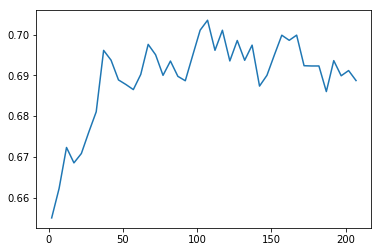

In [93]:
plt.plot(k_range ,k_range_score)

In [101]:
k_range[np.argmax(k_range_score)]


107

#### finally, choose top 110 element by chi2 test, set logistic regression parameter as C =44444.49999999999, multi_class ='multinomial',solver= 'saga',penalty = 'l2',tol = 0.0001,class_weight = None, the model can reach 70.25% accuracy

### SVM part

In [75]:
from sklearn.svm import SVC
svc = SVC()


In [78]:
svc.fit(preproc_reviews_withstop, y)
svc.score(preproc_reviews_withstop, y)

0.6463262764632628

In [77]:

scores = cross_val_score(svc, preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.6426944656279843

### select best kernel and penalty

In [102]:
param_svc= dict(kernel = ['linear','poly', 'rbf', 'sigmoid'],C = c_range)#find the best solver
grid_search_solver = GridSearchCV(svc, param_grid=param_svc, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [103]:
scores = cross_val_score(SVC(**{'C': 0.1, 'kernel': 'linear'}), preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.6426944656279843

In [106]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(SVC(**{'C': 0.1, 'kernel': 'linear'}),X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())

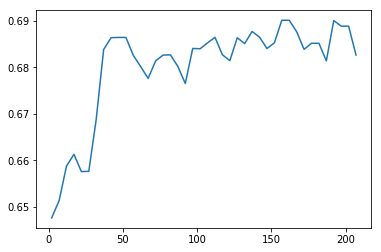

In [107]:
plt.plot(k_range ,k_range_score)

In [108]:
k_range[np.argmax(k_range_score)]

157

### because svm donesn't support build in regularization, i will use LinearSVC

In [109]:
from sklearn.svm import LinearSVC

In [111]:
lin_svc = LinearSVC()

In [117]:
param_linearsvc= dict(dual=[False],
                      #l1 didn't support hinge
                      penalty = ['l1','l2'],
                      multi_class = ['crammer_singer','ovr'],
                      C = c_range,
                      class_weight =[None,'balanced'],
                      tol = tol_range)
grid_search_solver = GridSearchCV(lin_svc, param_grid=param_linearsvc, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}

In [118]:
scores = cross_val_score(LinearSVC(**{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}), preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.7011694801925841

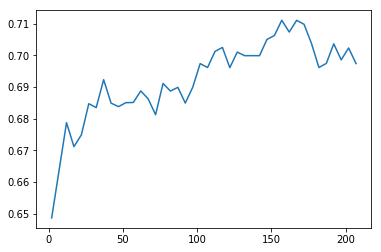

In [119]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(LinearSVC(**{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}),X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())
plt.plot(k_range ,k_range_score)

In [120]:
k_range[np.argmax(k_range_score)]

157

In [121]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.base import SamplerMixin
from imblearn.utils import hash_X_y

In [123]:
fs_chi = SelectKBest(chi2, k=157)
X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
pipe = make_pipeline(RandomOverSampler(random_state=0), LinearSVC())
pipe.fit(X_kbest, y)
pipe.score(X_kbest, y)

0.8293897882938979

In [124]:
scores = cross_val_score(pipe,X_kbest, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.5868171397999277

In [156]:

pipe = make_pipeline(SMOTE(random_state=0,kind='svm'), LinearSVC(penalty='l1',dual=False,C=10,multi_class= 'crammer_singer'))
pipe.fit(preproc_reviews_withstop, y)
pipe.score(preproc_reviews_withstop, y)

0.9302615193026152

In [157]:
scores = cross_val_score(pipe,X_kbest, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.5843459761682979

In [127]:
fs_chi = SelectKBest(chi2, k=157)
X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
pipe = make_pipeline(ADASYN(random_state=0), LinearSVC())
pipe.fit(X_kbest, y)
pipe.score(X_kbest, y)

0.7297633872976339

In [128]:
scores = cross_val_score(pipe,X_kbest, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.520559947658332

In [159]:
from imblearn.under_sampling import RandomUnderSampler

In [160]:
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(preproc_reviews_withstop, y)

In [161]:
pd.value_counts(y_resampled)

5.0    50
4.0    50
3.0    50
2.0    50
1.0    50
dtype: int64

In [162]:
pd.value_counts(y)

5.0    516
4.0    109
1.0     75
3.0     53
2.0     50
dtype: int64

In [166]:
scores = cross_val_score(LinearSVC(),X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.33599999999999997

In [169]:
from imblearn.over_sampling import RandomOverSampler

In [175]:
rus = RandomOverSampler()
X_resampled, y_resampled = rus.fit_sample(preproc_reviews_withstop, y)

In [172]:
pd.value_counts(y_resampled)

3.0    516
4.0    516
2.0    516
1.0    516
5.0    516
dtype: int64

In [176]:
scores = cross_val_score(LinearSVC(),X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.8806636500754148

### random forest part